In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import scipy.io as sio
import scipy.sparse as sp

from matplotlib import pyplot as plt
from helpers import (
    draw_edges, get_borderless_fig, pos_spring_layout, signed_layout, get_lcc, signed_normalized_laplacian, flatten,
    pos_adj, neg_adj
)
from viz_helpers import draw_query_result
from stat_helpers import populate_fields

In [46]:
def get_row_by_query(df, query):
    return df[df['query'] == query].iloc[0]

def show(g, df, q, prefix="", **kwargs):
    r = get_row_by_query(df, q)
    fig, ax = draw_query_result(g, r['C1'], r['C2'], show_query=True, r=r, **kwargs)
    ax.set_title('{} q:{}, agr:{:.2f}, ham:{:.2f}, beta: {:.2f}, opp:{:.2f}, coh:{:.2f}, max_posdeg:{:.2f}'.format(
        prefix, q, r['agreement'], r['ham'], r['best_beta'], r['opp'], r['coh'], r['max_posdeg']
    ))
    
def load_data(graph):
    g = nx.read_gpickle('graphs/{}.pkl'.format(graph))
    df = pd.read_pickle('outputs/{}_aug.pkl'.format(graph))
    return g, df            


In [48]:
graph = 'word'

In [49]:
g, df = load_data(graph)

In [50]:
df = df[df['k'] == 200]

In [51]:
df['pos_avg'] = (df['posdeg1'] * df['size1'] + df['posdeg1'] * df['size2']) / (df['size1'] + df['size2'])

In [52]:
# fields_to_show = ['query', 'best_beta', 'size1', 'size2', 'ham', 'coh', 'opp', 'max_posdeg', 'pos_avg']
fields_to_show = ['query', 'size1', 'size2', 'opp', 'max_posdeg', 'pos_avg']

In [53]:
sub_df = df.sort_values(by=['opp', 'pos_avg'], ascending=False)

In [54]:
sub_df[fields_to_show].head(3)

,query,size1,size2,opp,max_posdeg,pos_avg
1200,1965,9,11,0.717172,8.545455,6.666667
1293,1244,7,6,0.547619,6.000000,6.000000
2425,4690,12,12,0.520833,8.333333,6.000000


In [55]:
def get_words_string_from_indices(indices):
    return " ".join([g.graph['i2w'][i] for i in indices])

C1: infinitesimal minuscule miniature diminutive wee tiny mini peewee minute
C2: bigger larger mammoth giant huge macro bumper wide large super broad
----------
C1: ephemeral interim fly-by-night temporary acting makeshift transient
C2: immortal permanent infinite everlasting god standing
----------
C1: tiny peewee mini infinitesimal minuscule miniature minimum diminutive wee baby minute relative
C2: infinite bigger larger mammoth giant huge macro wide bumper large super broad
----------
C1: interim temporary fly-by-night acting makeshift ephemeral transient working
C2: permanent everlasting final standing unemployed sustained trusty
----------
C1: discomfited insomniac down-and-out defeated ashamed penitent
C2: roaring successful productive relaxed winning in
----------
C1: gallant egocentric fearless stalwart brave gradually desperate confident game bold
C2: craven hen chicken timid afraid faint pleading
----------
C1: larger bigger more mammoth giant huge macro bumper wide limitless

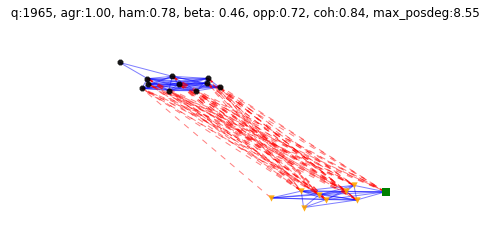

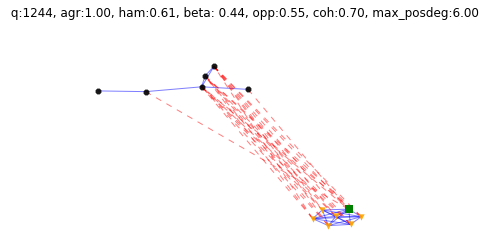

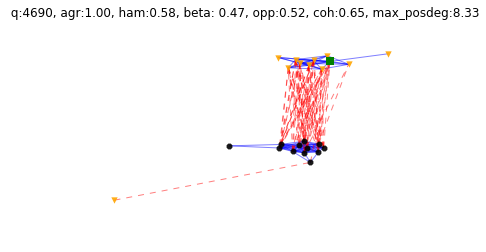

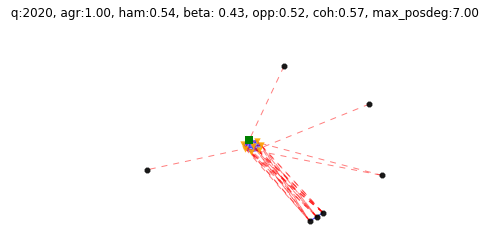

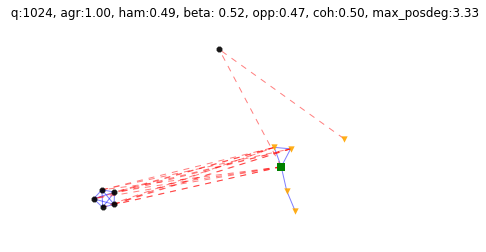

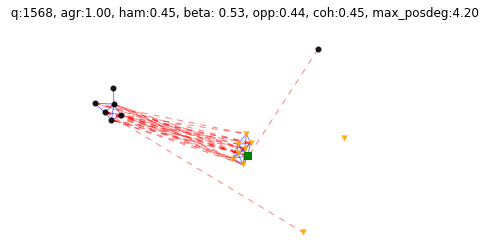

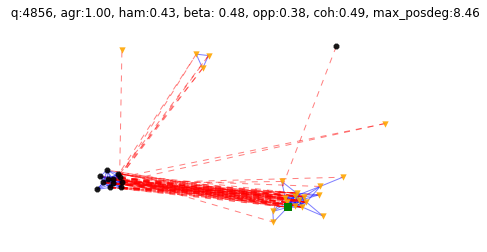

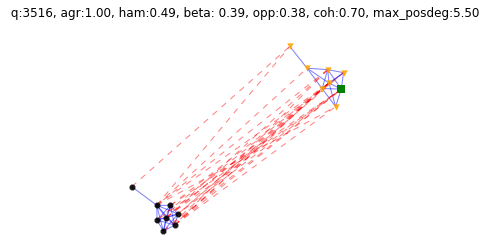

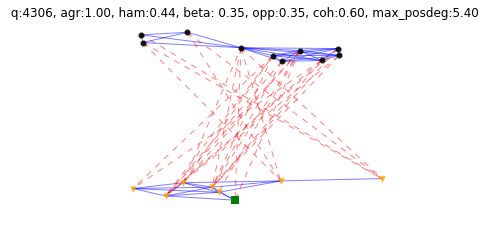

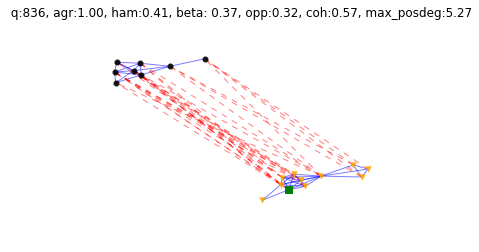

In [56]:
for i, r in sub_df.head(10).iterrows():
    if graph == 'word':
        print('C1:', get_words_string_from_indices(r['C1']))
        print('C2:', get_words_string_from_indices(r['C2']))
    else:
        print('C1:', r['C1'])
        print('C2:', r['C2'])
    print('-'*10)    
    show(g, sub_df, r['query'])
